# Current Vector Stack with ADCP Data

## Using Quiver3D in Matplotlib to generate a 3D representation of current in a single water column

For this visualization, we will require the northward and eastward components of the water velocity and the depth of each of these component vectors to generate a 3-dimensional hub and spoke plot.

In [1]:
# imports
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# date adjustment constants; OOI portal timestamps from 1900, Python timestamps from 1970
seconds_per_year = 31557600
year_offset = 70

Note the difference in timestamp protocol between the OOI data portal and Python. OOI timestamps begin from 1900 while Python begins from 1970. Therefore, if we require readable dates in our final plot, we will need to subtract 70 years' worth of seconds from our data. These constants help to simplify this function.

But first, let's read in our data. We use the M2M interface on the OOI Data Portal to produce a water column stack of vectors at a particular point in time. April 19, 2017 sounds good.

In [19]:
# securely retrieve credentials. create an account on the data portal to get yours today!
user = ""
token = ""
creds = []


with open("creds.txt") as c:
    for line in c:
        creds.append(line.strip())

user = creds[0]
token = creds[1]

# start building url
base = "https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/"
# coastal endurance oregon inshore mooring
node = "CE01ISSM/"
# seafloor multifunction subsite
subsite = "MFD35/"
# instrument name
inst = "04-ADCPTM000/"
# stream method/name
stream = "telemetered/adcp_velocity_earth"
# parameters - limit to one data point, say when we want it
time = "?beginDT=2017-04-19T12:00:00.050Z&endDT=2017-04-19T13:00:00.050Z"
param = "&limit=1"

# get the data
resp = requests.get(base+node+subsite+inst+stream+time+param,auth=(user,token))
j = resp.json()

# convert to dictionary
data = j[0]

# isolate x/y vectors
x = data["water_velocity_east"]
y = data["water_velocity_north"]

print("  x  |  y  ")
print("===========")
for a,b in zip(x,y):
    print("%-4d | %4d" % (a,b))

  x  |  y  
-3   |  155
-19  |  159
-17  |  143
-9   |  142
-13  |  152
-14  |  177
-11  |  176
-21  |  193
-21  |  191
-16  |  209
-39  |  200
-60  |  173
-66  |  146
-64  |  104
-37  |   37
-88  |   40
-112 |   51
-121 |   60
-144 |  166
-149 |  198
-113 |  305
-223 |  293
-791 |  428
-638 |  754
-796 |  613
-433 |  389
-437 |  390
-450 |  369
-461 |  244
-474 |  224


Now with our velocities known, a quick unit conversion from mm/s to m/s

In [4]:
vx = [i / 1000 for i in x]
vy = [j / 1000 for j in y]

Now we need to resolve the z-axis. For this dataset, how deep is each bin and how tall will the total stack be? Fortunately, a bin_depths array makes this easy. And, for easier viewing, we multiply each value by -1 to reorient our view as if the observer stood above the water column looking downward.

In [7]:
depths = data["bin_depths"]
depths = [i * -1 for i in depths]

Finally, we plot our figure with Quiver3D

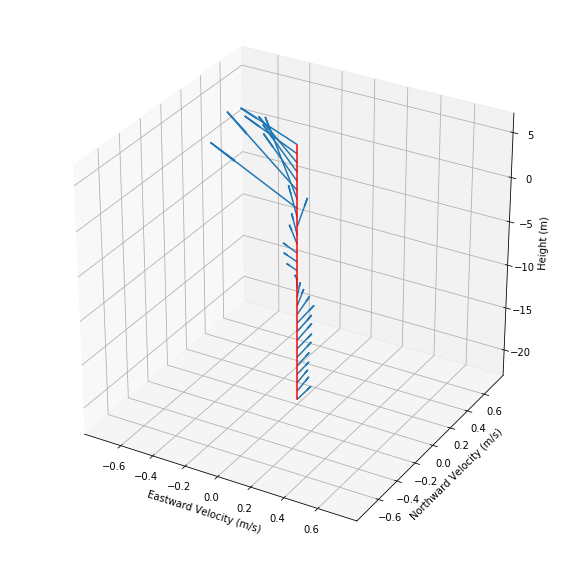

In [8]:
# set up figure
fig = plt.figure(figsize=(10,10))

# make it pretty and scaled for our data
ax = fig.add_subplot(111, projection='3d')
max_xy = max(np.absolute(vx + vy))
# number bins is equal to the length of any of the datatype lists
ax.set_xlim(-max_xy,max_xy)
ax.set_ylim(-max_xy,max_xy)
ax.set_zlim(min(depths), max(depths))
ax.set_xlabel("Eastward Velocity (m/s)")
ax.set_ylabel("Northward Velocity (m/s)")
ax.set_zlabel("Height (m)")

# plot current vectors
ax.quiver(0,0,depths,vx,vy,0)

# plot central axis
zeros = [0 for x in depths]
ax.plot(zeros,zeros,depths,color="red")